In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
data = pd.read_csv('housing.csv')

In [37]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [39]:
data.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

In [41]:
data.dropna(inplace = True)

In [43]:
from sklearn.model_selection import train_test_split
x = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [115]:
train_data = x_train.join(y_train)
print(x_train.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')


In [49]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2341,-119.68,36.81,13.0,2589.0,413.0,1356.0,435.0,5.0253,106200.0,False,True,False,False,False
18326,-122.16,37.45,52.0,1135.0,219.0,441.0,200.0,7.5418,492000.0,False,False,False,True,False
18594,-122.09,37.11,32.0,2637.0,489.0,1031.0,410.0,3.6474,231600.0,False,False,False,False,True
17321,-120.16,34.61,17.0,921.0,189.0,434.0,219.0,3.0185,500001.0,False,False,False,False,True
3500,-118.46,34.27,30.0,1576.0,282.0,1004.0,284.0,4.8015,179700.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14081,-117.12,32.77,43.0,2167.0,464.0,977.0,461.0,3.1250,192200.0,False,False,False,False,True
19133,-122.72,38.35,16.0,3049.0,609.0,1675.0,618.0,2.4117,162500.0,True,False,False,False,False
2824,-119.07,35.42,19.0,3889.0,832.0,1872.0,731.0,2.6812,107600.0,False,True,False,False,False
17442,-120.46,34.66,5.0,2904.0,702.0,1302.0,618.0,3.0081,135200.0,False,False,False,False,True


<Axes: xlabel='latitude', ylabel='longitude'>

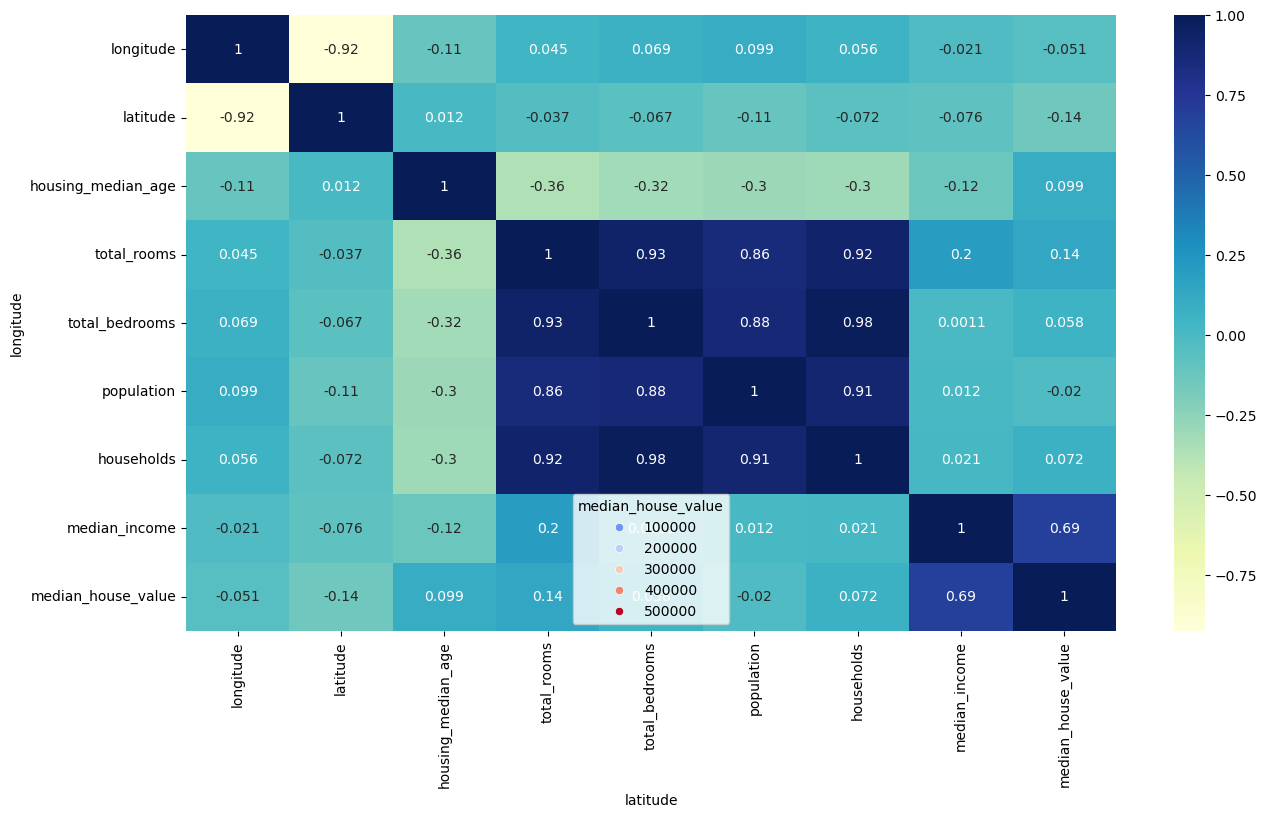

In [53]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.select_dtypes(include='number').corr(), annot = True, cmap = "YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

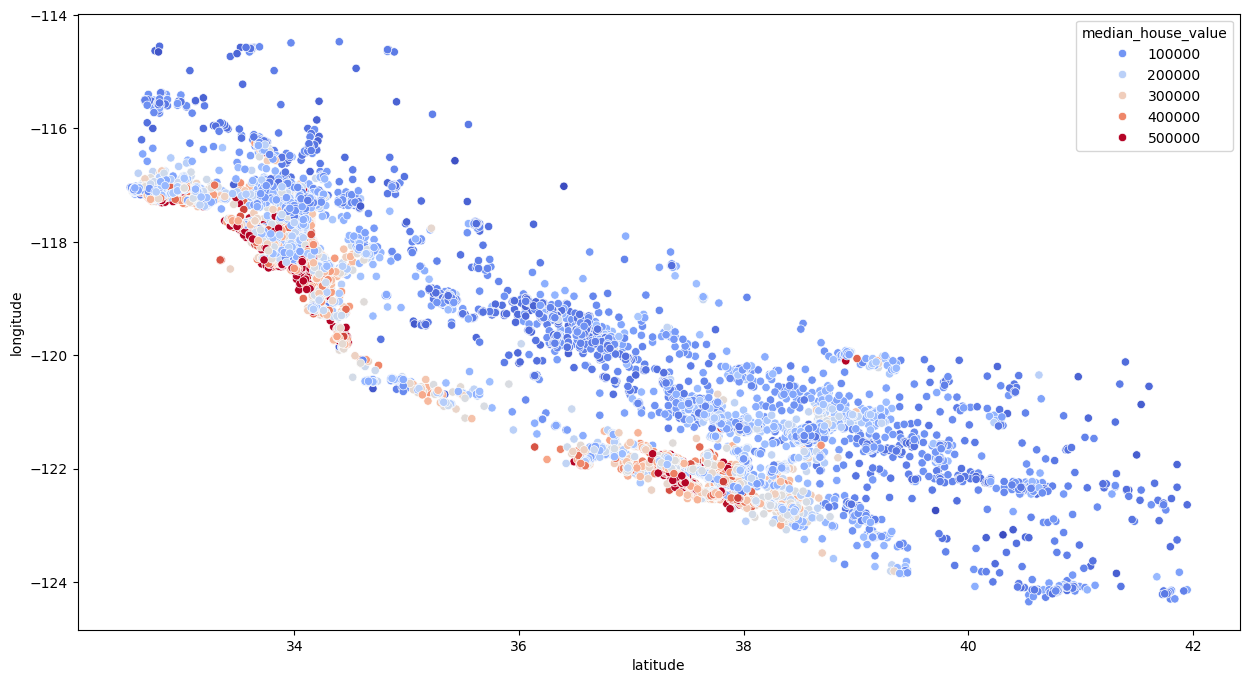

In [87]:
plt.figure(figsize = (15,  8))
sns.scatterplot(x ="latitude", y ='longitude', data=train_data, hue="median_house_value", palette="coolwarm")

In [107]:
from sklearn.linear_model import LinearRegression
x_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [104]:
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'


Would you like me to provide a corrected version of the code?

In [99]:
reg.score(x_test, y_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- bedoom_ratio
- household_rooms
